In [1]:
from experiment import Experiment
import torch
torch.manual_seed(2)
%matplotlib inline

In [2]:
var_dict = dict(
    categorical_vars = ['Work_accident', 'promotion_last_5years', 'sales', 
                        'salary', 'number_project','time_spend_company'],
    numerical_vars = ['satisfaction_level', 'last_evaluation', 'average_montly_hours'],
    class_var = 'left'
)

In [3]:
exp = Experiment('data/HR_comma_sep.csv', 
                 var_dict,
                 embedding_dim=64,
                 lr=0.001,
                 batch_size=1024,
                 weight_decay=0.001,
                 n_epoch=200,
                 verbose=True,
                 n_bins_range=[10,15],#range(15, 16),
                 n_init_bins_list=[15])

In [4]:
print('#Numerical Vars =', len(var_dict['numerical_vars']))
print('#Categorical Vars =', len(var_dict['categorical_vars']))
print('#Dummy coded categorical cols =', exp.n_dummy_coded_categorical_cols)

#Numerical Vars = 3
#Categorical Vars = 6
#Dummy coded categorical cols = 17


In [5]:
%time clustering_scores = exp.test_clustering_performance()

>>> Epoch = 1, Loss = 0.4465099275112152
>>> Epoch = 2, Loss = 0.3641078472137451
>>> Epoch = 3, Loss = 0.3224329352378845
>>> Epoch = 4, Loss = 0.3075174391269684
>>> Epoch = 5, Loss = 0.2993871569633484
>>> Epoch = 6, Loss = 0.29796671867370605
>>> Epoch = 7, Loss = 0.29738157987594604
>>> Epoch = 8, Loss = 0.29657045006752014
>>> Epoch = 9, Loss = 0.29557228088378906
>>> Epoch = 10, Loss = 0.29652082920074463
>>> Epoch = 11, Loss = 0.2928021550178528
>>> Epoch = 12, Loss = 0.2937031090259552
>>> Epoch = 13, Loss = 0.2948582172393799
>>> Epoch = 14, Loss = 0.29457178711891174
>>> Epoch = 15, Loss = 0.29401811957359314
>>> Epoch = 16, Loss = 0.29626622796058655
>>> Epoch = 17, Loss = 0.29575663805007935
>>> Epoch = 18, Loss = 0.29657498002052307
>>> Epoch = 19, Loss = 0.2956511080265045
>>> Epoch = 20, Loss = 0.29673853516578674
>>> Epoch = 21, Loss = 0.29717183113098145
>>> Epoch = 22, Loss = 0.29665160179138184
>>> Epoch = 23, Loss = 0.2955726087093353
>>> Epoch = 24, Loss = 0.29758

>>> Epoch = 193, Loss = 0.2996300458908081
>>> Epoch = 194, Loss = 0.29970309138298035
>>> Epoch = 195, Loss = 0.2977534234523773
>>> Epoch = 196, Loss = 0.3003007173538208
>>> Epoch = 197, Loss = 0.3000437617301941
>>> Epoch = 198, Loss = 0.2990584969520569
>>> Epoch = 199, Loss = 0.2997695505619049
>>> Epoch = 200, Loss = 0.3002568781375885
Learning Embedding Finished!
CPU times: user 3min 41s, sys: 27.3 s, total: 4min 9s
Wall time: 3min 41s


In [6]:
exp.print_clustering_scores(clustering_scores, method='dummy_only')

kmeans, #Cols = 34, NMI = 0.0019
agglomerative, #Cols = 34, NMI = 0.0115


In [7]:
exp.print_clustering_scores(clustering_scores, method='scale_numeric')

kmeans, #Cols = 34, NMI = 0.0005
agglomerative, #Cols = 34, NMI = 0.2184


In [8]:
exp.print_clustering_scores(clustering_scores, method='equal_width')

kmeans
#Bins = 10, #Cols = 61, #NMI = 0.0148
#Bins = 15, #Cols = 76, #NMI = 0.0148
agglomerative
#Bins = 10, #Cols = 61, #NMI = 0.3031
#Bins = 15, #Cols = 76, #NMI = 0.1321


In [9]:
exp.print_clustering_scores(clustering_scores, method='equal_freq')

kmeans
#Bins = 10, #Cols = 61, #NMI = 0.0148
#Bins = 15, #Cols = 76, #NMI = 0.0148
agglomerative
#Bins = 10, #Cols = 61, #NMI = 0.2868
#Bins = 15, #Cols = 76, #NMI = 0.1293


In [10]:
exp.print_clustering_scores(clustering_scores, method='semantic_binning')

kmeans
#Init Bins = 15, #Cols = 61, NMI = 0.0148
agglomerative
#Init Bins = 15, #Cols = 61, NMI = 0.3114


In [11]:
exp.semantic_binning.bins_by_var

{'average_montly_hours': {'bins': ['(95.999, 142.0]',
   '(142.0, 150.0]',
   '(150.0, 158.0]',
   '(158.0, 168.0]',
   '(168.0, 181.0]',
   '(181.0, 193.0]',
   '(193.0, 207.0]',
   '(207.0, 232.0]',
   '(232.0, 243.0]',
   '(243.0, 310.0]'],
  'split_point': [95.999,
   142.0,
   150.0,
   158.0,
   168.0,
   181.0,
   193.0,
   207.0,
   232.0,
   243.0,
   310.0]},
 'last_evaluation': {'bins': ['(0.359, 0.57]',
   '(0.57, 0.65]',
   '(0.65, 0.7]',
   '(0.7, 0.82]',
   '(0.82, 0.86]',
   '(0.86, 0.89]',
   '(0.89, 0.97]',
   '(0.97, 1.0]'],
  'split_point': [0.359, 0.57, 0.65, 0.7, 0.82, 0.86, 0.89, 0.97, 1.0]},
 'satisfaction_level': {'bins': ['(0.089, 0.14]',
   '(0.14, 0.317]',
   '(0.317, 0.4]',
   '(0.4, 0.45]',
   '(0.45, 0.52]',
   '(0.52, 0.57]',
   '(0.57, 0.76]',
   '(0.76, 0.81]',
   '(0.81, 0.85]',
   '(0.85, 0.9]',
   '(0.9, 0.95]',
   '(0.95, 1.0]'],
  'split_point': [0.089,
   0.14,
   0.317,
   0.4,
   0.45,
   0.52,
   0.57,
   0.76,
   0.81,
   0.85,
   0.9,
   0.9

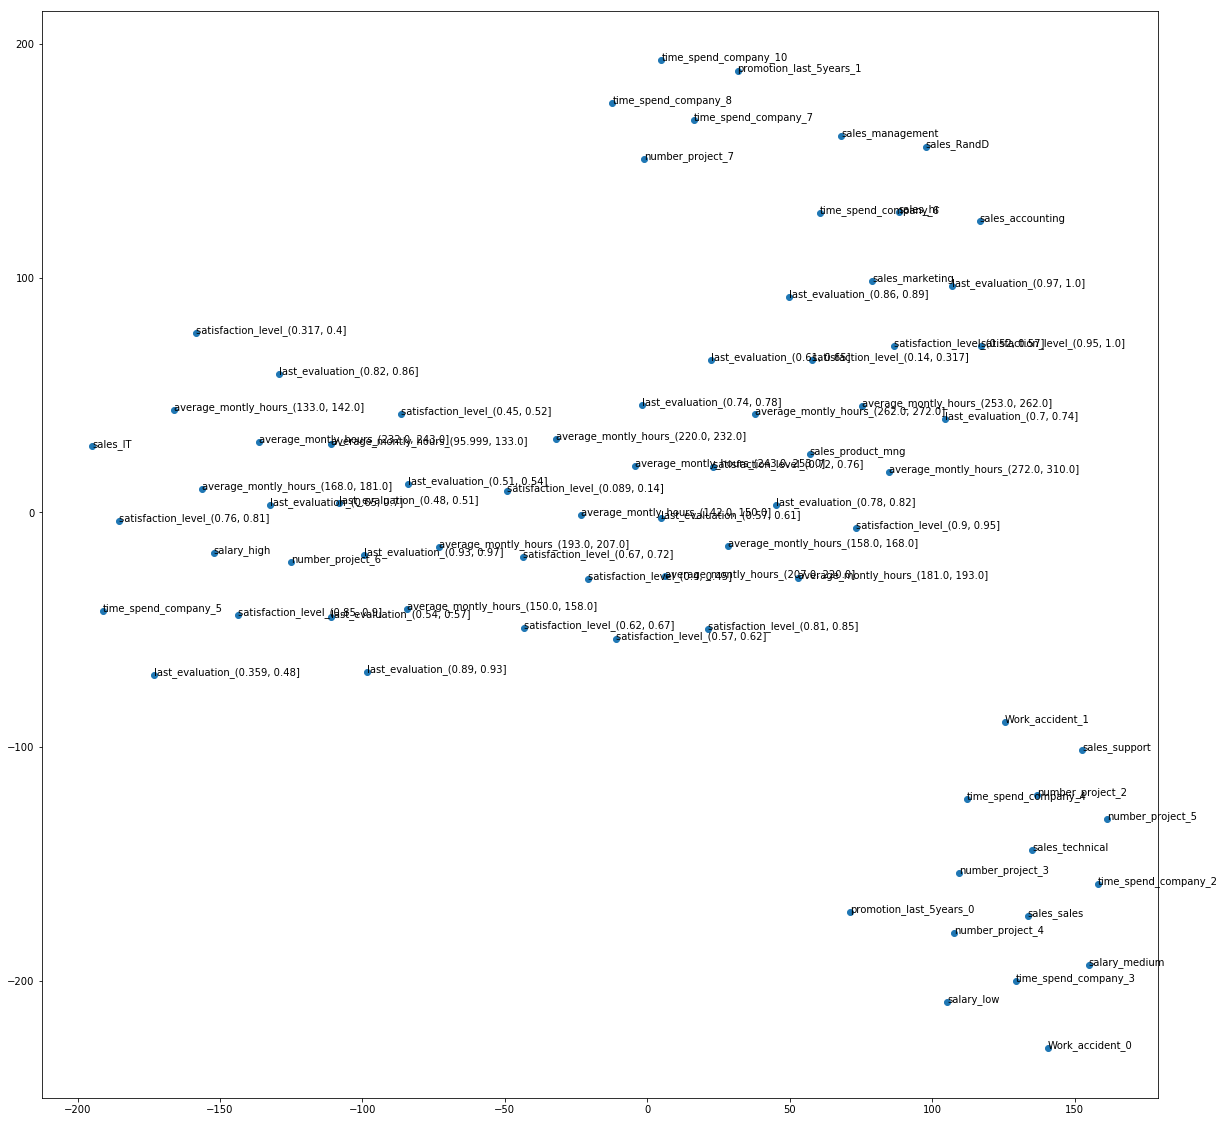

In [12]:
exp.semantic_binning.visualize_bin_embeddings()

In [13]:
temp = exp.semantic_binning.bin_embedder.embedding_by_column

In [14]:
temp.keys()

dict_keys(['Work_accident_0', 'Work_accident_1', 'promotion_last_5years_0', 'promotion_last_5years_1', 'sales_IT', 'sales_RandD', 'sales_accounting', 'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng', 'sales_sales', 'sales_support', 'sales_technical', 'salary_high', 'salary_low', 'salary_medium', 'number_project_2', 'number_project_3', 'number_project_4', 'number_project_5', 'number_project_6', 'number_project_7', 'time_spend_company_10', 'time_spend_company_2', 'time_spend_company_3', 'time_spend_company_4', 'time_spend_company_5', 'time_spend_company_6', 'time_spend_company_7', 'time_spend_company_8', 'satisfaction_level_(0.089, 0.14]', 'satisfaction_level_(0.14, 0.317]', 'satisfaction_level_(0.317, 0.4]', 'satisfaction_level_(0.4, 0.45]', 'satisfaction_level_(0.45, 0.52]', 'satisfaction_level_(0.52, 0.57]', 'satisfaction_level_(0.57, 0.62]', 'satisfaction_level_(0.62, 0.67]', 'satisfaction_level_(0.67, 0.72]', 'satisfaction_level_(0.72, 0.76]', 'satisfaction_lev

In [15]:
import numpy as np
def find_nn(query, embedding_by_column, k=10, exclude_self=False):
    embedding_of_query = embedding_by_column[query]
    distances = dict()
    for col, embedding in embedding_by_column.items():
        distances[col] = np.linalg.norm(embedding - embedding_of_query)
    knn = sorted(distances.items(), key=lambda x: x[1])
    if exclude_self:
        knn = knn[1:]
    return knn[:k]

find_nn('average_montly_hours_(137.0, 150.0]', temp, k=10)

KeyError: 'average_montly_hours_(137.0, 150.0]'

### (1) 다른 데이터셋?

### (3) 정성 평가?

### (2) 수렴하면 중도에 멈추도록 하고 싶은데, 체크할 방법?